===========iteration:0===========
SGD:2.3519824736076456
Momentum:2.3585855896087926
AdaGrad:2.4780721103923167
Adam:2.2661263409214394
===========iteration:100===========
SGD:1.48023099701133
Momentum:0.29425187679370207
AdaGrad:0.14289042384312967
Adam:0.23097461316512377
===========iteration:200===========
SGD:0.7161784317665605
Momentum:0.24311755309690666
AdaGrad:0.09050322377599478
Adam:0.20366377787349682
===========iteration:300===========
SGD:0.4714566829110412
Momentum:0.2133544727294565
AdaGrad:0.06559184788419428
Adam:0.19244862253016848
===========iteration:400===========
SGD:0.429881366463419
Momentum:0.1816181593772765
AdaGrad:0.050184902075395735
Adam:0.0814689569212105
===========iteration:500===========
SGD:0.4352222614730635
Momentum:0.2735665180981763
AdaGrad:0.15056570734571684
Adam:0.2173145045470918
===========iteration:600===========
SGD:0.2748036610906789
Momentum:0.09631780392923178
AdaGrad:0.029819062232804547
Adam:0.04244742971522913
===========iteration:700

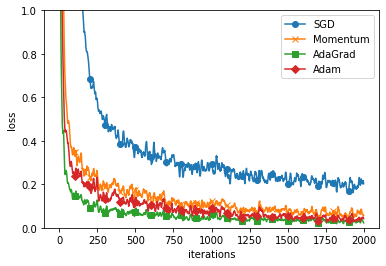

In [1]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
%matplotlib inline 
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험을 위한 사전설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))
    
# 3. 그래프 그리기
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()